In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")
plt.style.use("ggplot")
sns.set_style("whitegrid")

In [5]:
df = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\ad_10000records.csv")

In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [8]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [9]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [10]:
df.drop_duplicates(keep = "first", inplace = True)

In [11]:
df.shape

(9785, 10)

In [12]:
numeric = df.select_dtypes(exclude = "object")

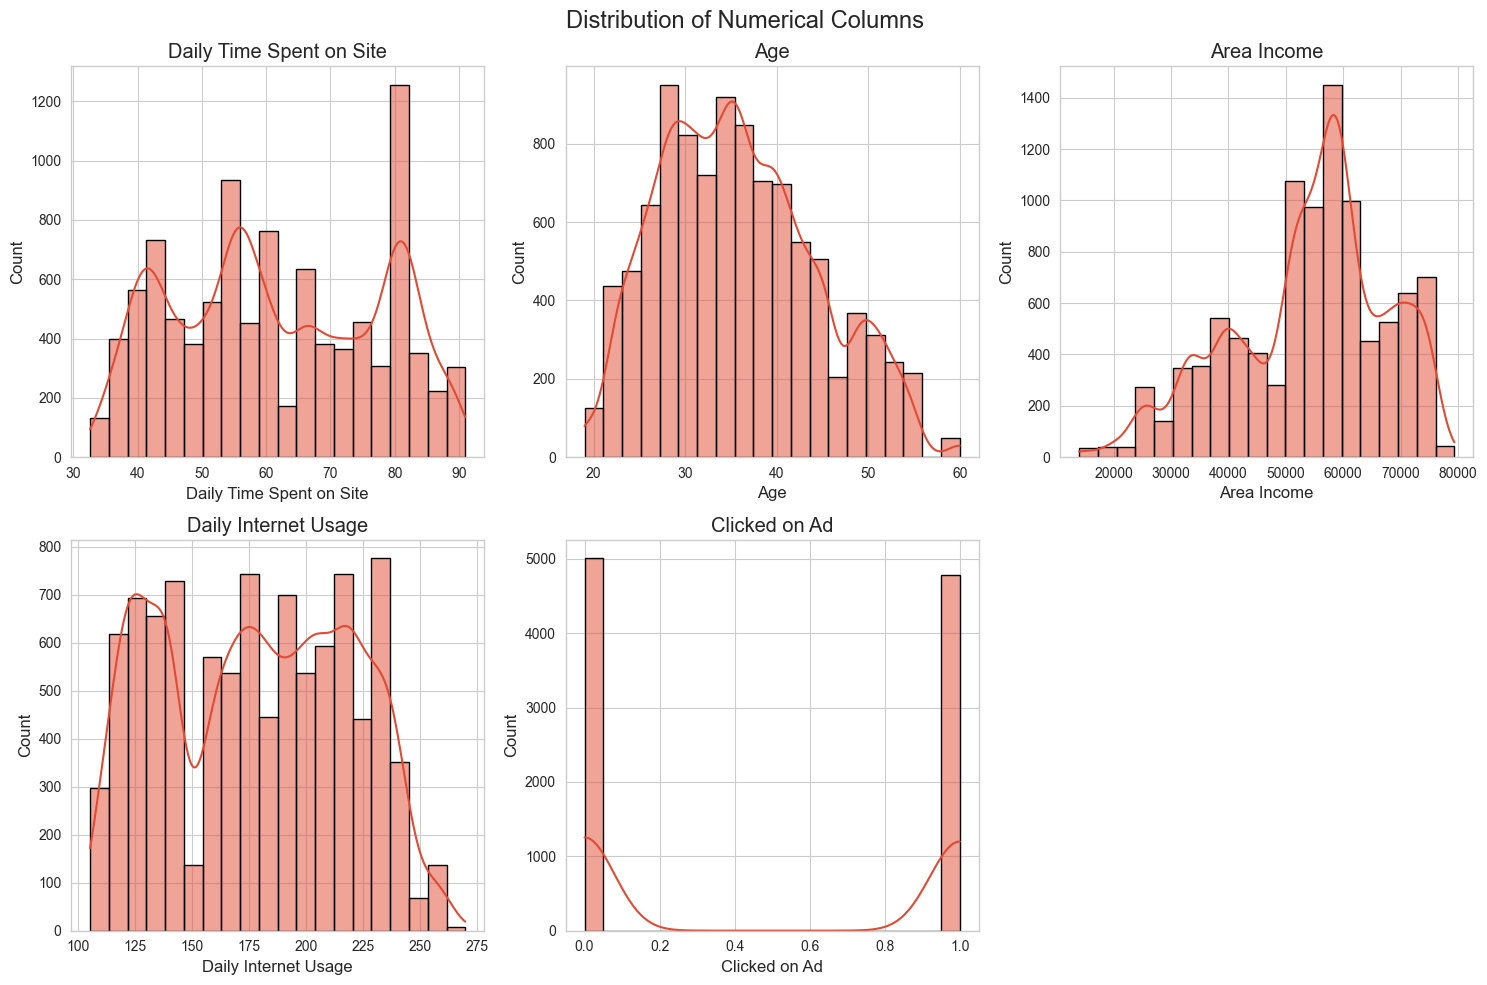

In [13]:
plt.figure( figsize = (15,10))

for index , i in enumerate(numeric.columns ,1):
    plt.subplot(2,3,index)
    sns.histplot(df[i], linewidth = 1, edgecolor = "k", bins = 20, kde = True)
    plt.title(i)

plt.suptitle("Distribution of Numerical Columns", size = 17)
plt.tight_layout()
plt.show()

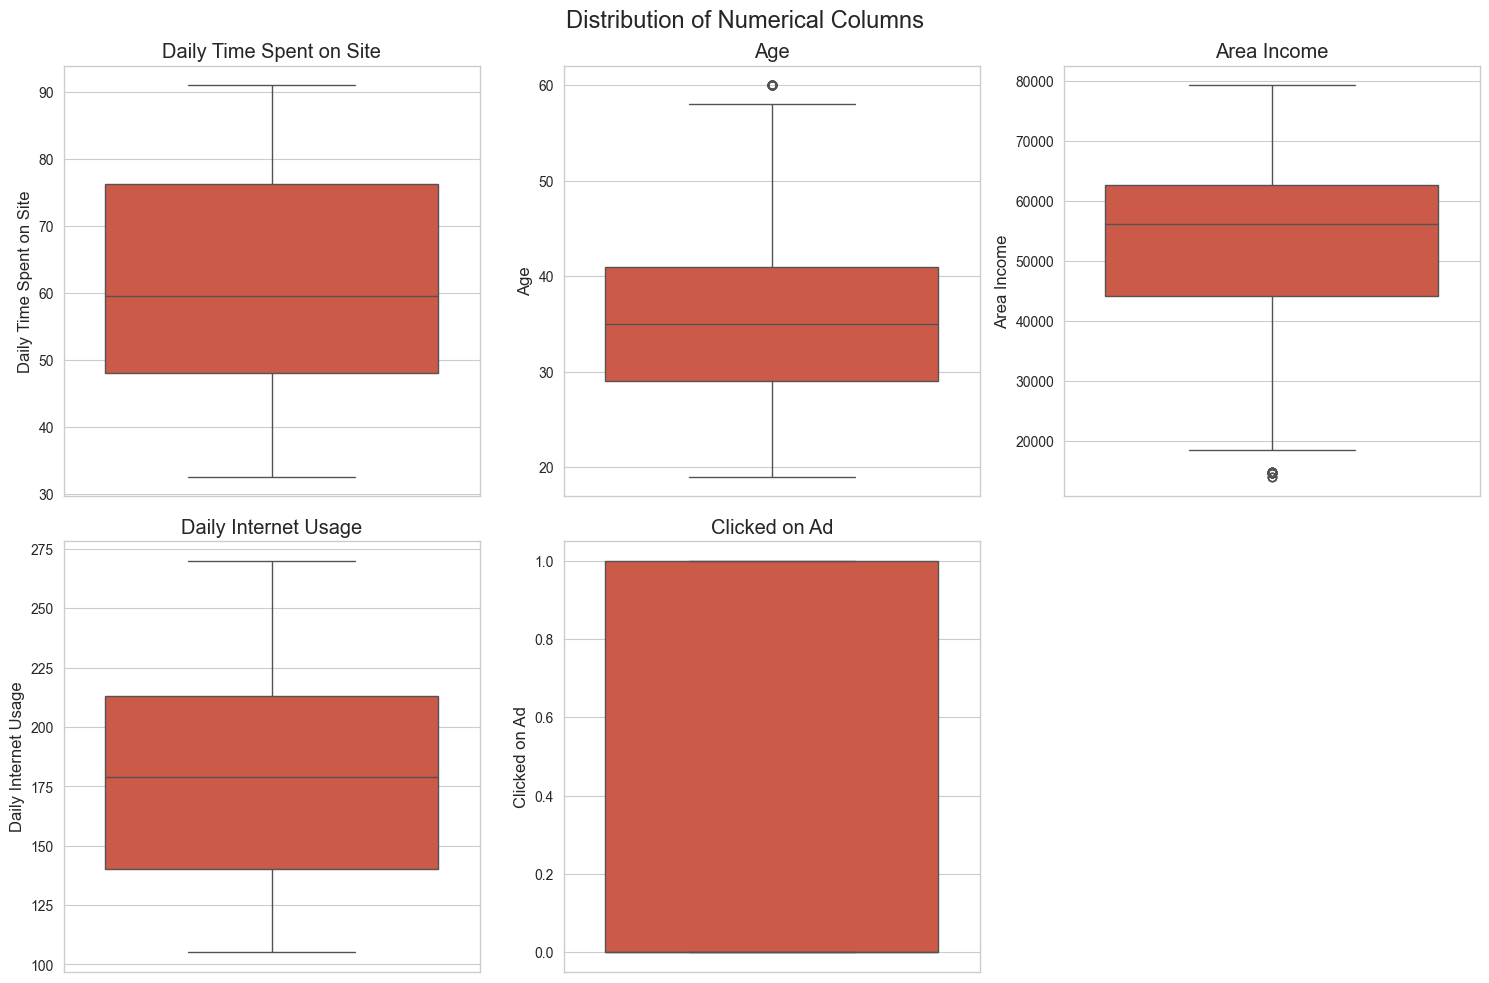

In [14]:
plt.figure( figsize = (15,10))

for index , i in enumerate(numeric.columns ,1):
    plt.subplot(2,3,index)
    sns.boxplot(df[i])
    plt.title(i)

plt.suptitle("Distribution of Numerical Columns", size = 17)
plt.tight_layout()
plt.show()

In [15]:
from scipy.stats import describe

In [16]:
for col in numeric.columns:
    des = describe(df[col])
    print(f'Summary Stats of the column :- {col}\n')
    print(des)
    print()

Summary Stats of the column :- Daily Time Spent on Site

DescribeResult(nobs=9785, minmax=(32.6, 90.97), mean=61.6013786407767, variance=246.4339706563917, skewness=0.0751156601103189, kurtosis=-1.2137924489926841)

Summary Stats of the column :- Age

DescribeResult(nobs=9785, minmax=(19.0, 60.0), mean=35.83955033214103, variance=72.90638736932354, skewness=0.37483699226194445, kurtosis=-0.5046216589491062)

Summary Stats of the column :- Area Income

DescribeResult(nobs=9785, minmax=(13996.5, 79332.33), mean=53948.143347981604, variance=178490979.43230945, skewness=-0.509408741959571, kurtosis=-0.31457823479638636)

Summary Stats of the column :- Daily Internet Usage

DescribeResult(nobs=9785, minmax=(105.22, 269.96), mean=177.88614409810936, variance=1669.692808403191, skewness=0.004417246902392665, kurtosis=-1.1767807430596264)

Summary Stats of the column :- Clicked on Ad

DescribeResult(nobs=9785, minmax=(0, 1), mean=0.48860500766479303, variance=0.24989569279994117, skewness=0.04

In [17]:
category = df.select_dtypes(include = "object")

In [18]:
category.head(2)

,Ad Topic Line,City,Gender,Country,Timestamp
0,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05
1,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05


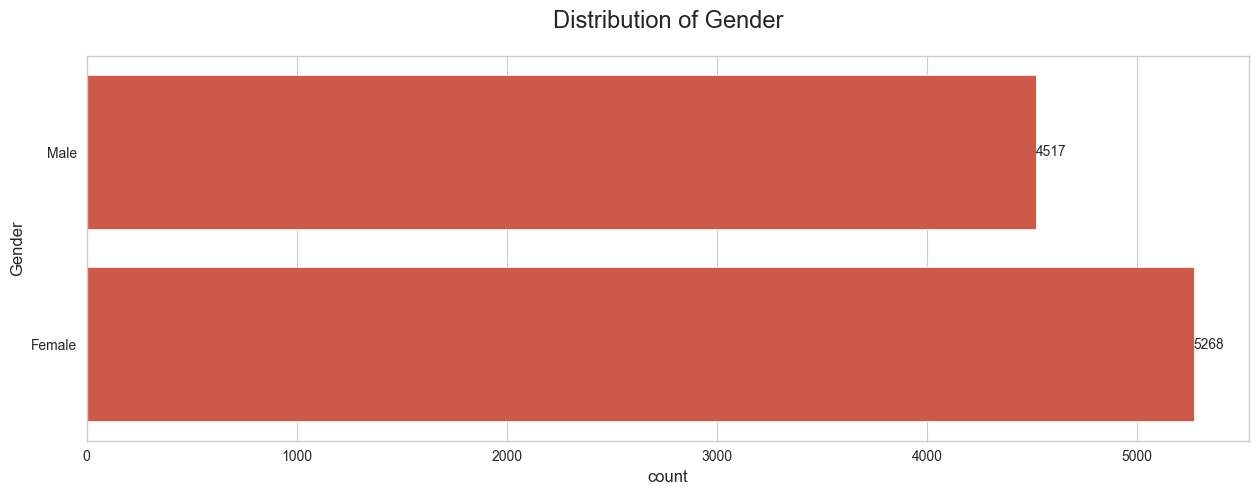

In [19]:
plt.figure( figsize = (15,5))

ax = sns.countplot( category["Gender"] )

for i in ax.containers:
    ax.bar_label(i)

plt.title("Distribution of Gender", size =17, pad = 20)
plt.show()

In [20]:
country = category.groupby('Country').size().reset_index(name = 'count')
country = country.sort_values(by = "count", ascending = False).head()
country

,Country,count
9,Australia,346
44,Czech Republic,325
187,Turkey,296
149,Qatar,222
81,Hong Kong,221


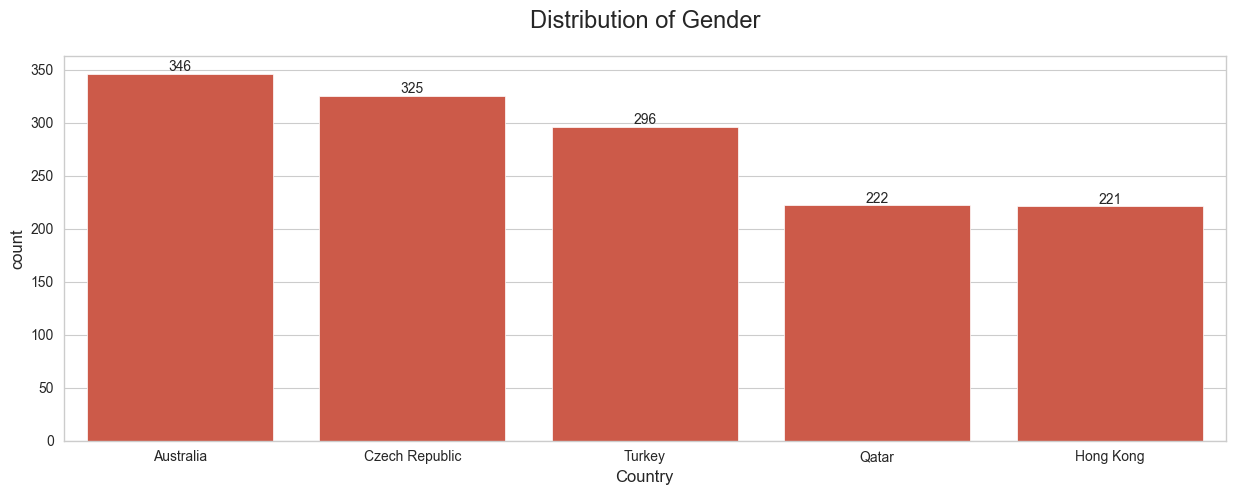

In [21]:
plt.figure( figsize = (15,5))

ax = sns.barplot(country , x = "Country", y = "count")

for i in ax.containers:
    ax.bar_label(i)

plt.title("Distribution of Gender", size =17, pad = 20)
plt.show()

In [22]:
city = category.groupby('City').size().reset_index(name = 'count')
city = city.sort_values(by = "count", ascending = False).head()
city

,City,count
136,Hubbardmouth,330
234,Lisafort,235
515,Wintersfort,225
379,Reyesfurt,205
436,Stewartbury,204


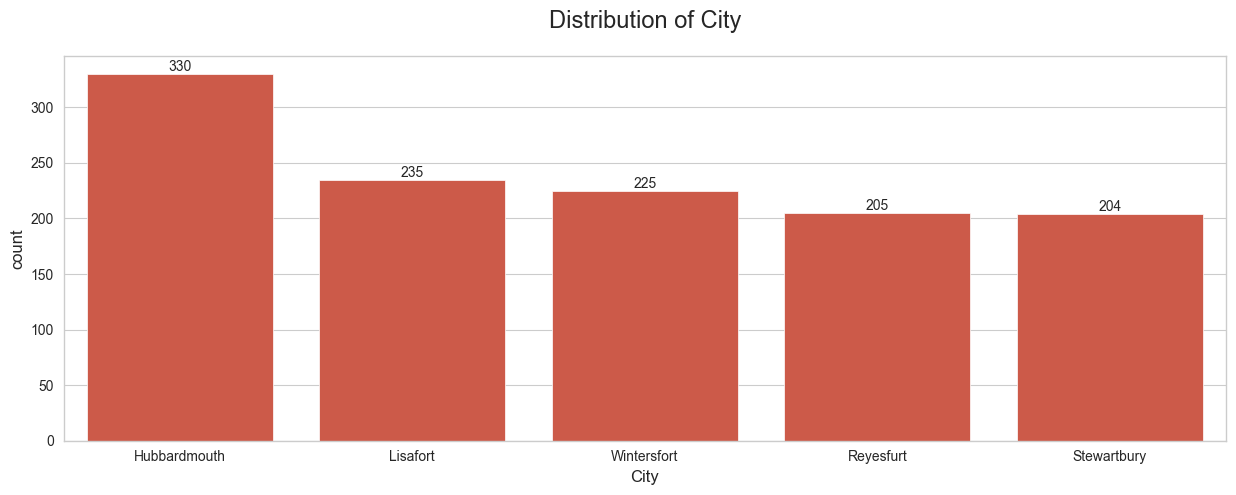

In [23]:
plt.figure( figsize = (15,5))

ax = sns.barplot(city , x = "City", y = "count")

for i in ax.containers:
    ax.bar_label(i)

plt.title("Distribution of City", size =17, pad = 20)
plt.show()

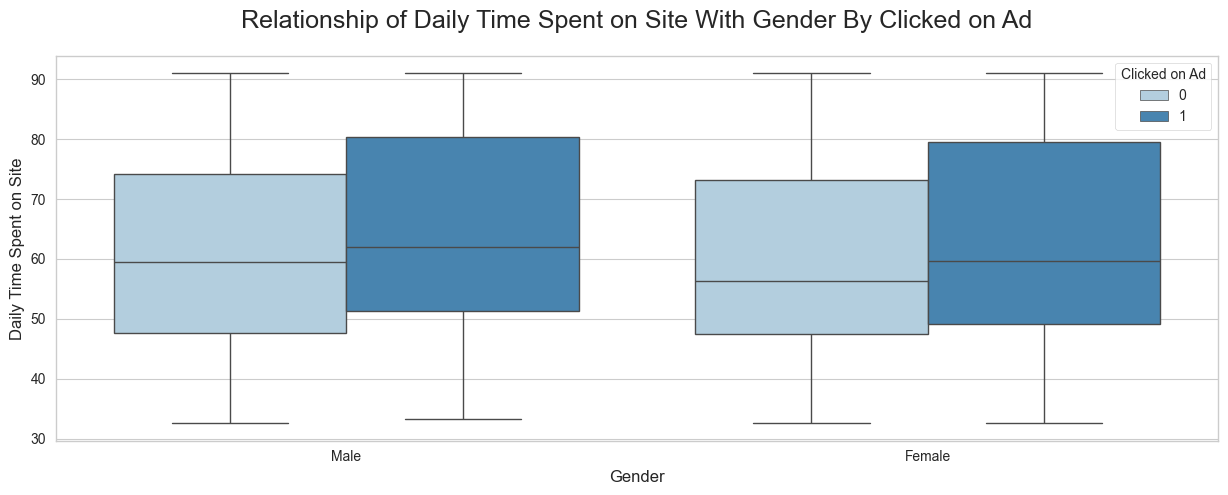

In [24]:
plt.figure( figsize = (15,5))

sns.boxplot(df , x = "Gender", y = "Daily Time Spent on Site", hue = "Clicked on Ad", palette = "Blues")

plt.title('Relationship of Daily Time Spent on Site With Gender By Clicked on Ad', pad = 20 , size = 18)
plt.show()

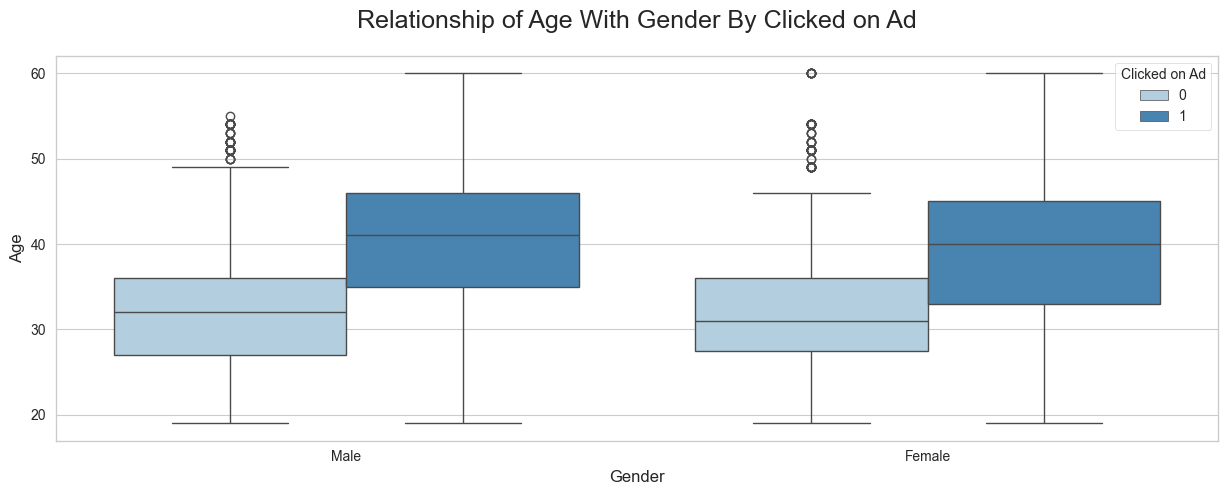

In [25]:
plt.figure( figsize = (15,5))

sns.boxplot(df , x = "Gender", y = "Age", hue = "Clicked on Ad", palette = "Blues")

plt.title('Relationship of Age With Gender By Clicked on Ad', pad = 20 , size = 18)
plt.show()

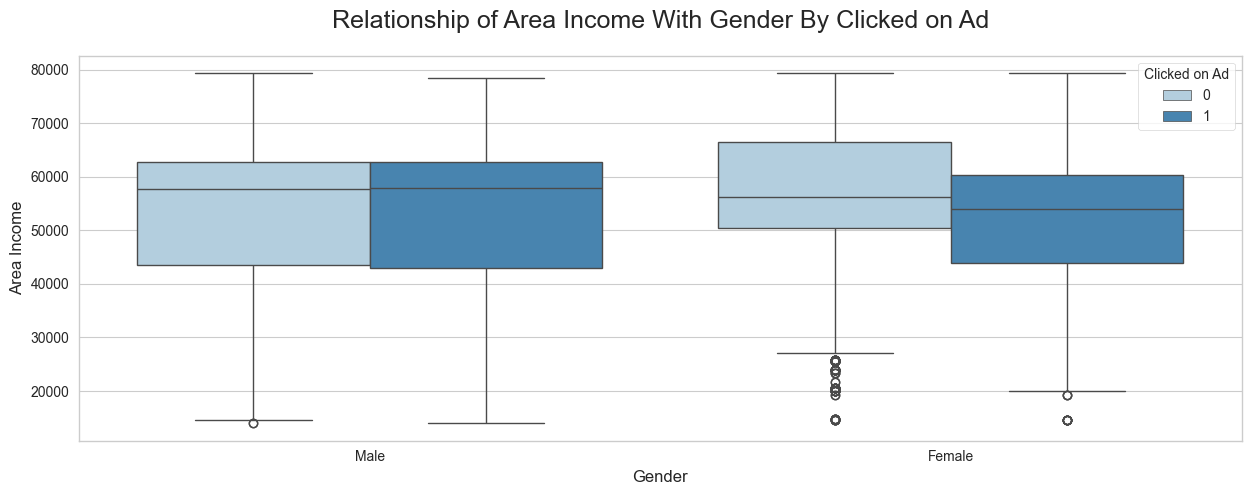

In [26]:
plt.figure( figsize = (15,5))

sns.boxplot(df , x = "Gender", y = "Area Income", hue = "Clicked on Ad", palette = "Blues")

plt.title('Relationship of Area Income With Gender By Clicked on Ad', pad = 20 , size = 18)
plt.show()

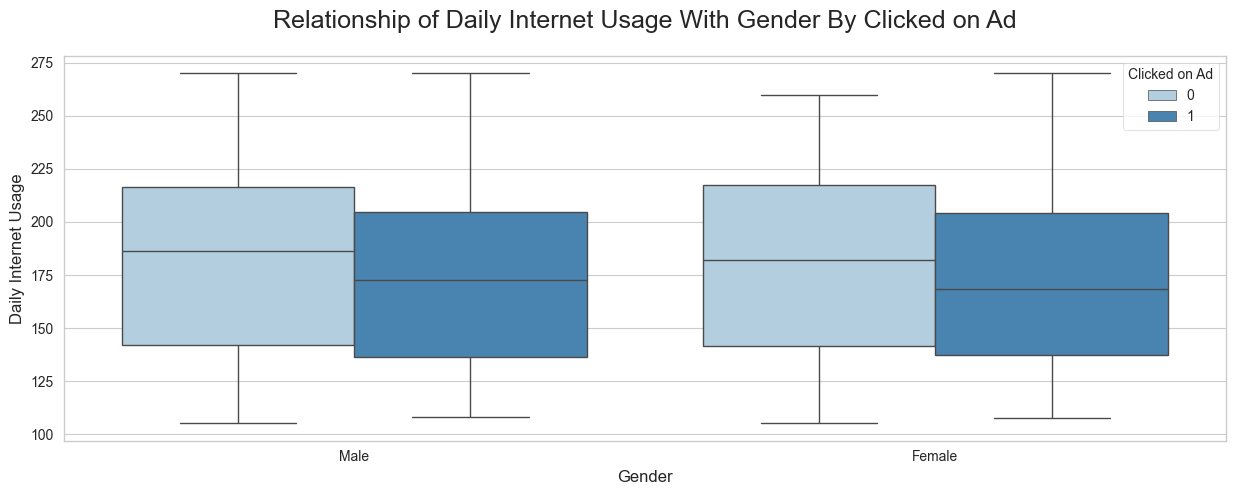

In [27]:
plt.figure( figsize = (15,5))

sns.boxplot(df , x = "Gender", y = "Daily Internet Usage", hue = "Clicked on Ad", palette = "Blues")

plt.title('Relationship of Daily Internet Usage With Gender By Clicked on Ad', pad = 20 , size = 18)
plt.show()

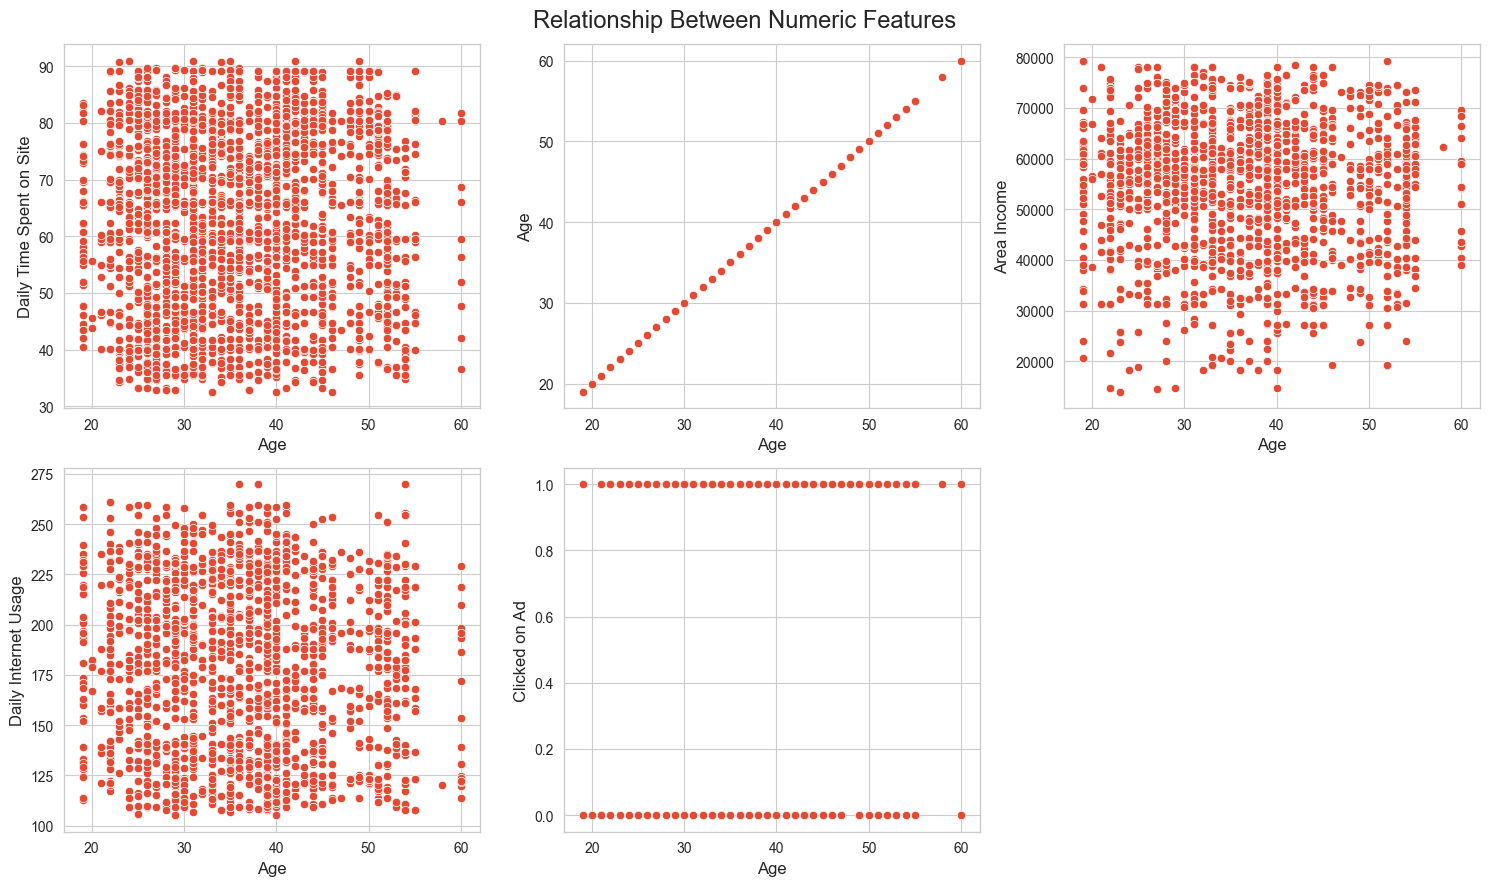

In [28]:
plt.figure( figsize = (15,9))

for index , i in enumerate(numeric.columns,1):
    plt.subplot(2,3,index)
    sns.scatterplot(x = df["Age"], y = df[i])
    plt.xlabel("Age")
    plt.ylabel(i)

plt.suptitle("Relationship Between Numeric Features", size = 17)
plt.tight_layout()
plt.show() 

In [29]:
ctr = df["Clicked on Ad"].value_counts().get(1) / df['Clicked on Ad'].count() * 100
print(f'CTR = {round(ctr, ndigits = 2)}')

CTR = 48.86


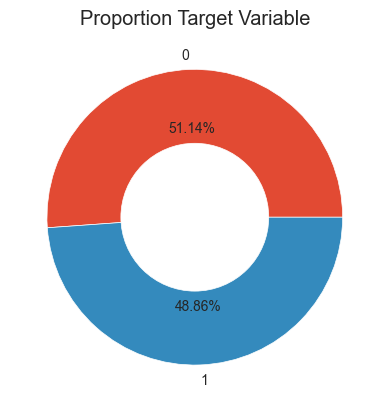

In [30]:
plt.pie( df["Clicked on Ad"].value_counts() , labels = df["Clicked on Ad"].value_counts().keys(), autopct = "%1.2f%%")

circle = plt.Circle((0,0), radius = 0.5, fc = "white")
plt.gca().add_artist(circle)

plt.title("Proportion Target Variable")
plt.show()

In [31]:
df["Month"] = pd.to_datetime(df['Timestamp']).dt.month

In [32]:
df["DayOfWeek"] = pd.to_datetime(df['Timestamp']).dt.dayofweek

In [33]:
df["week_category"] = df['DayOfWeek'].apply(lambda x : "weekend" if x > 4 else "weekday")

In [34]:
df["Time"] = pd.to_datetime(df['Timestamp']).dt.time

In [35]:
df.drop(columns = "Timestamp", inplace = True, axis = 1)

In [36]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

In [37]:
df["Gender"] = df["Gender"].map({'Male':1, 'Female':0})

In [38]:
new_df = df.apply(lambda x : LabelEncoder().fit_transform(x) if x.dtype == "object" else x)

In [39]:
new_df.corr()['Clicked on Ad'].sort_values(ascending = False)

Clicked on Ad               1.000000
Age                         0.450654
City                        0.163218
Time                        0.126149
Ad Topic Line               0.107476
Daily Time Spent on Site    0.087020
week_category               0.001504
Country                    -0.019060
DayOfWeek                  -0.044835
Month                      -0.047174
Gender                     -0.052095
Area Income                -0.064073
Daily Internet Usage       -0.124950
Name: Clicked on Ad, dtype: float64

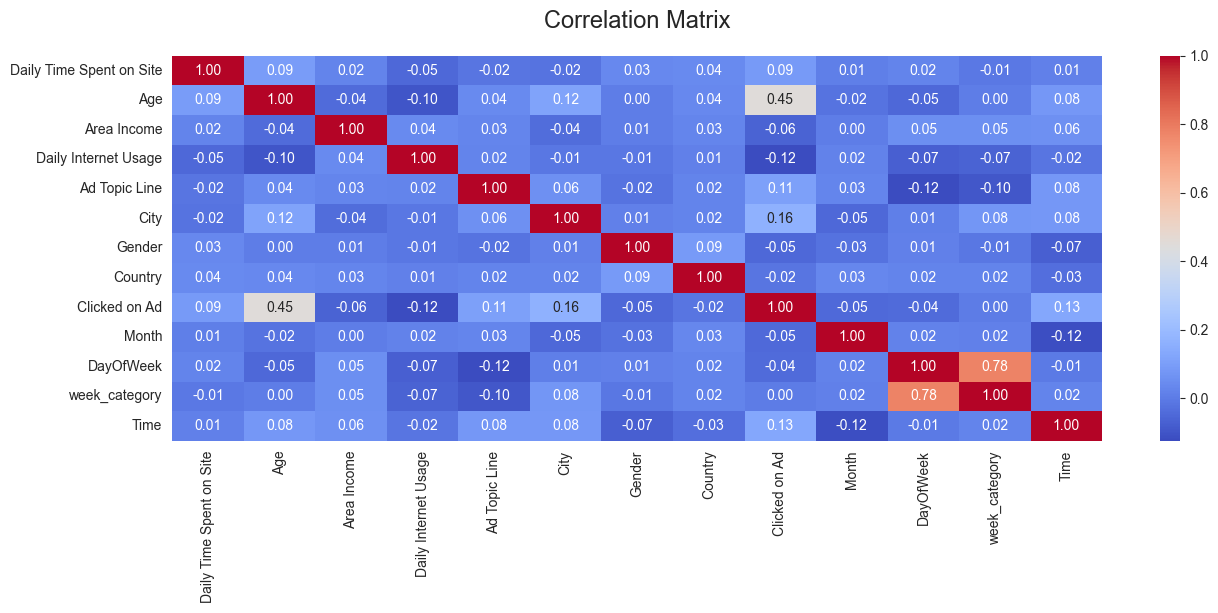

In [40]:
plt.figure( figsize = (15,5))

sns.heatmap(new_df.corr(), annot = True, fmt = "1.2f", cmap = "coolwarm")

plt.title("Correlation Matrix", size = 17 , pad = 20)
plt.show()

In [59]:
from scipy.stats import ttest_ind

In [62]:
zero = df[df["Clicked on Ad"] == 0]["Age"]
one = df[df["Clicked on Ad"] == 1]["Age"]

stats, p_value = ttest_ind(zero,one, equal_var = False)

"No Difference" if p_value > 0.05 else "Difference"

'Difference'

In [41]:
x = new_df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Gender']]
y = new_df["Clicked on Ad"]

In [42]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [43]:
params = {"max_depth": [None, 10,15,5,20] ,
          "min_samples_split": [10,15,20] , 
          "criterion": ['gini','entropy'] ,
          "n_estimators": [100,200,300] ,
          "min_samples_leaf": [2,5,7,8]}

In [45]:
rfc = RandomizedSearchCV(
                        RandomForestClassifier(random_state = 42),
                        param_distributions = params,
                        scoring = "accuracy",
                        n_jobs = -1,
                        n_iter = 10,
                        cv = 5
                        )

In [46]:
rfc.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 15, 5, 20],
                                        'min_samples_leaf': [2, 5, 7, 8],
                                        'min_samples_split': [10, 15, 20],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [47]:
rfc = rfc.best_estimator_

In [48]:
rfc

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=20,
                       random_state=42)

In [49]:
fi = pd.DataFrame({"Features":x.columns, "importance":rfc.feature_importances_*100})
fi.sort_values(by = "importance", ascending = False)

,Features,importance
1,Age,48.178230
3,Daily Internet Usage,20.511055
2,Area Income,17.018095
0,Daily Time Spent on Site,12.560265
4,Gender,1.732355


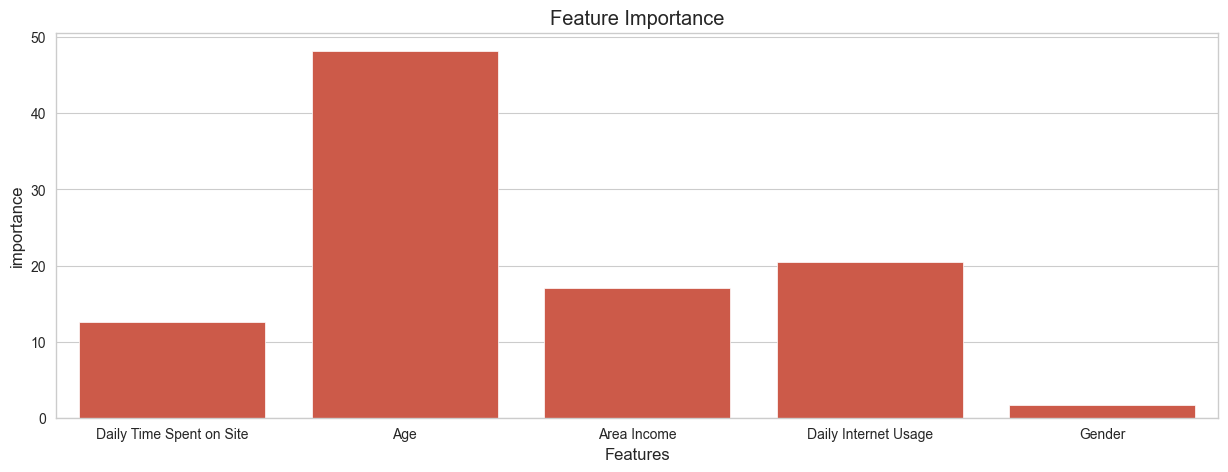

In [58]:

plt.figure(figsize = (15,5))
sns.barplot(fi, x = 'Features', y = 'importance')

plt.title('Feature Importance')
plt.show()

In [50]:
train_pred = rfc.predict(x_train)

print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3743
           1       0.87      0.83      0.85      3595

    accuracy                           0.86      7338
   macro avg       0.86      0.86      0.86      7338
weighted avg       0.86      0.86      0.86      7338



In [51]:
print(f'\n Confusion Matrix Of Train Pred\n')

print(confusion_matrix(y_train, train_pred))


 Confusion Matrix Of Train Pred

[[3292  451]
 [ 605 2990]]


In [52]:
test_pred = rfc.predict(x_test)

print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1261
           1       0.79      0.73      0.76      1186

    accuracy                           0.78      2447
   macro avg       0.78      0.77      0.77      2447
weighted avg       0.78      0.78      0.78      2447



In [53]:
print(f'\n Confusion Matrix Of Test Pred\n')

print(confusion_matrix(y_test, test_pred))


 Confusion Matrix Of Test Pred

[[1028  233]
 [ 316  870]]


In [55]:
print("Ads Click Through Rate Prediction : ")
a = float(input("Daily Time Spent on Site: "))
b = float(input("Age: "))
c = float(input("Area Income: "))
d = float(input("Daily Internet Usage: "))
e = input("Gender (Male = 1, Female = 0) : ")
features = np.array([[a, b, c, d, e]])
print("Will the user click on ad = ", rfc.predict(features))

Ads Click Through Rate Prediction : 


Daily Time Spent on Site:  65
Age:  21
Area Income:  10000
Daily Internet Usage:  250
Gender (Male = 1, Female = 0) :  1


Will the user click on ad =  [0]
